<a href="https://colab.research.google.com/github/MillenaThalyne/Curso-de-Estatistica-/blob/main/Curso_de_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Alura/Estatística com Python/Dados/dados.csv', sep=",")
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Distribuição dos dados qualitativos

Funções:
*   value_counts()
*   crosstab() do Pandas



---
Como fazer distribuição de dados qualitativos, suas contagens, junção com outros campos e algumas dicas de como melhorar sua visualização.




In [3]:
#Distribuição dos dados da coluna "sexo"
frequencia = dados['Sexo'].value_counts()

In [4]:
#Distribuição dos dados da coluna "sexo" em porcentagem
percentual = dados['Sexo'].value_counts(normalize = True) * 100

In [5]:
#Criando um DataFrame com as informações de distribuição de dados da coluna "sexo" e a porcentagem da mesma
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis=1, inplace=True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [6]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [7]:
#Distribuição dos dados da coluna "sexo" e "cor"
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns = cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [8]:
#Distribuição dos dados da coluna "sexo" e "cor" em porcentagem
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize=True) * 100
percentual.rename(index = sexo, inplace=True)
percentual.rename(columns = cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [9]:
#E nesse caso, temos a média da renda de cada pessoa de acordo com a cor e o sexo.
#Importante notar que tiramos o "normalize=True"
percentual = pd.crosstab(dados.Sexo, dados.Cor,aggfunc='mean', values=dados.Renda) * 100
percentual.rename(index = sexo, inplace=True)
percentual.rename(columns = cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,108171.093750,292574.443543,160386.168666,475825.106383,165957.742489
Feminino,246438.613861,210986.674982,113459.640014,302734.188034,117675.851593


#Distribuição de dados quantitativos 

*   cut()


---
Descobrindo valores minimos e maximos para fazer intervalo de dados quantitativos, categorizações e amplitudes fixas


In [10]:
#Descobrindo o valor mínimo de "Renda"
dados.Renda.min()

0

In [11]:
#Descobrindo o valor máximo de "Renda"
dados.Renda.max()

200000

In [12]:
#Criando array com todo o range de "Renda"
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [13]:
#Criando array (descrescente) com as classes dos nossos intervalos de renda para categorização
labels = ['E', 'D', 'C', 'B', 'A']

In [14]:
#Usando "cut()" para fazer essa categorização: x=dados usados, bins=número de classes (intervalos), labels=classes, include_lowest=Incluindo o valor minimo (0) na contagem
pd.cut(x = dados.Renda, bins=classes, labels=labels, include_lowest=True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [15]:
#Contagens de "renda" por categoria
frequencia = pd.value_counts(pd.cut(x = dados.Renda, bins=classes, labels=labels, include_lowest=True))

In [16]:
#Contagens de "renda" por categoria em porcentagem
percentual = pd.value_counts(pd.cut(x = dados.Renda, bins=classes, labels=labels, include_lowest=True), normalize=True) * 100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [17]:
#Criando DataFrame para as frequencias e porcentagens de "Renda"
dist_freq_quantitativas_personalizadas = pd.DataFrame({'Frequência': frequencia, 'Porcentual (%)': percentual})
#Ordenando as classes de forma descendente
dist_freq_quantitativas_personalizadas.sort_index(ascending=False)

,Frequência,Porcentual (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [18]:
#Pegando número de linhas que possuimos
n = dados.shape[0]
n

76840

In [19]:
#Descobrindo um número aproximado de classes que nosso dataset possui (k)
k = round(1 + (10/3) * np.log10(n))
k

17

In [20]:
#Frequencia da amplitude fixa
frequencia = pd.value_counts(pd.cut(x=dados.Renda, bins=17, include_lowest=True), sort=False)

In [21]:
#Frequencia da amplitude fixa em porcentagem
percentual = pd.value_counts(pd.cut(x=dados.Renda, bins=17, include_lowest=True), sort=False, normalize=True) * 100

In [22]:
#Criando DataFrame para nossa amplitude fixa
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame({'Frequência': frequencia, 'Porcentual (%)': percentual})
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentual (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


#Criando Histograma para visualização de dados

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


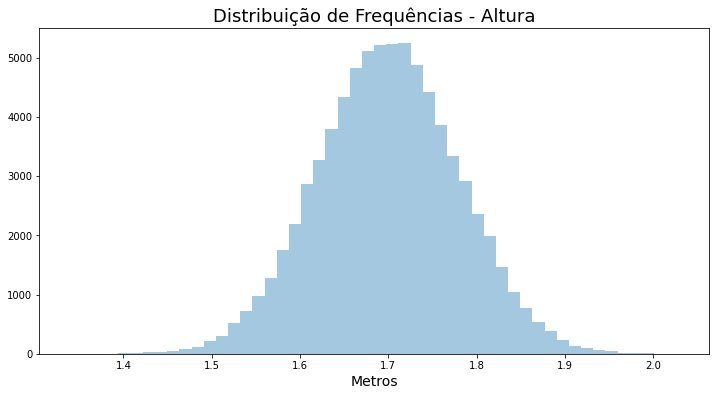

In [23]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

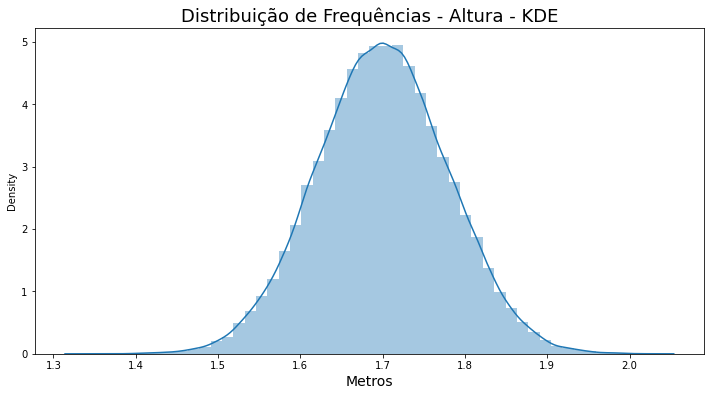

In [24]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

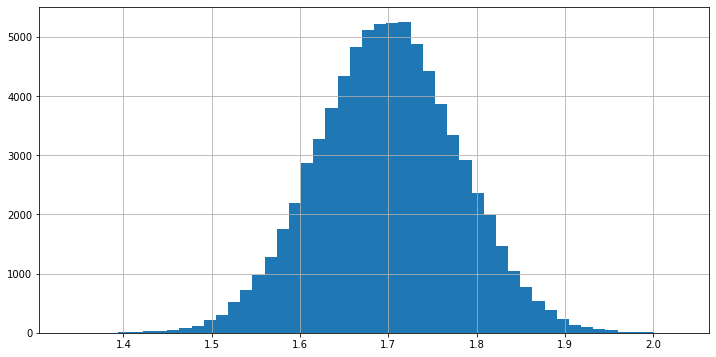

In [25]:
dados.Altura.hist(bins=50, figsize=(12, 6))

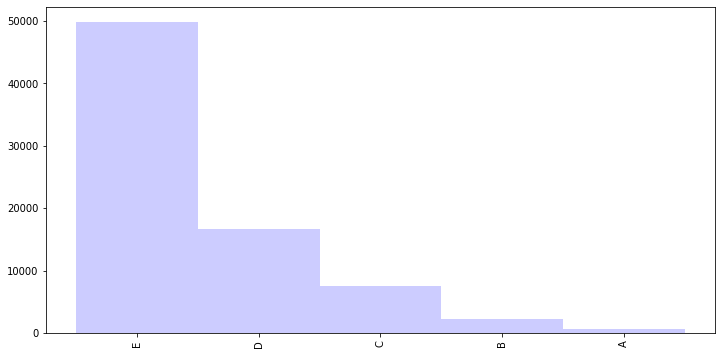

In [26]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width=1, color='blue', alpha=0.2, figsize=(12, 6))

#Medidas de Tendência Central

*   Média - mean()
*   Mediana - median()
*   Moda - mode()

---
Caracterizando elas e suas interrelações




In [27]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [28]:
#Calculando a média do campo "Renda"
dados.Renda.mean()

2000.3831988547631

In [29]:
#Para variáveis categóricas (dados qualitativos), temos como fazer análises específicas
#Nesse caso, vamos calcular a média de renda por sexo
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

In [30]:
#Calculando a mediana ímpar do nosso dataset "dados"
dados.Renda.median()

1200.0

In [31]:
#Outra forma de calcular a mediana ímpar do nosso dataset "dados"
dados.Renda.quantile()

1200.0

In [32]:
#Calculando a mediana ímpar e organizando suas notas
notas_fulano = df.Fulano
notas_fulano = notas_fulano.sort_values()
notas_fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [33]:
#Adicionando a coluna index com o nome das matérias
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [34]:
#Descobrindo o número de elementos de fulano e vendo que é um número ímpar
n = notas_fulano.shape[0]
n

7

In [35]:
#Calculando o elemento mediano (A posição onde está a mediana no dataset)
elemento_md = (n+1)/2
elemento_md

4.0

In [36]:
#Calculando a mediana de fulano
notas_fulano.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Fulano    8.0
dtype: float64

In [37]:
#Fazendo a mediana na raça
notas_fulano.loc[elemento_md - 1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [38]:
#Descobrindo a mediana de Beltrano
#O "sample" é responsável por fazer uma amostra aleatória dentro do dataframe
#O random_state é como um SEED, para travar os elementos e não deixa-los randomicos
notas_beltrano = df.Beltrano.sample(6, random_state = 101)
notas_beltrano.median()

6.25

In [39]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [40]:
dados.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

#Atividades Extras: Média

In [41]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [42]:
#A média do dataframe
dataset.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Idade    46.1
dtype: float64

In [43]:
#A média da idade por sexo
dataset.groupby(['Sexo'])['Idade'].mean()

Sexo
H    45.750000
M    46.333333
Name: Idade, dtype: float64

In [44]:
#Média de idade masculina
dataset.groupby('Sexo').mean().loc['H']

Idade    45.75
Name: H, dtype: float64

#Relação entre média mediana e moda

---

Simetria através de histogramas


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


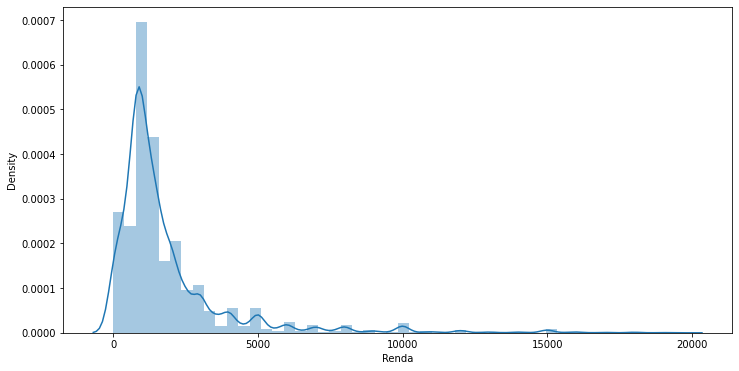

In [45]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

#

#Medidas Separatrizes

*   Quartis - quartile()
*   Decis
*   Percentis





In [46]:
#Separação de "Renda" em quartis
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [47]:
[i/10 for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [48]:
dados.Renda.quantile([i/10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [49]:
dados.Renda.quantile([i/100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


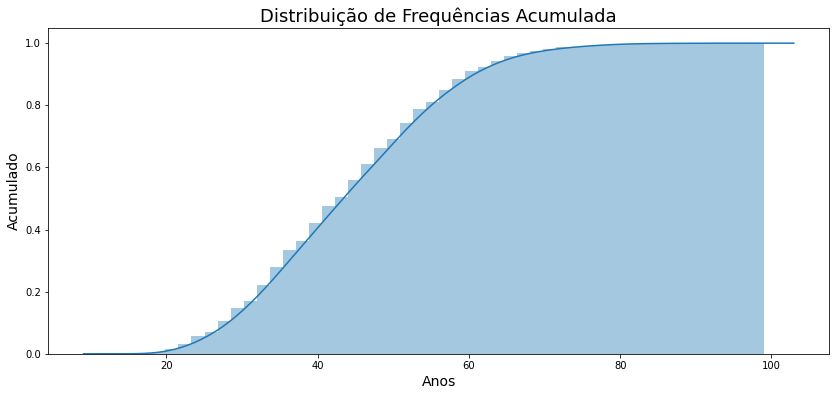

In [50]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


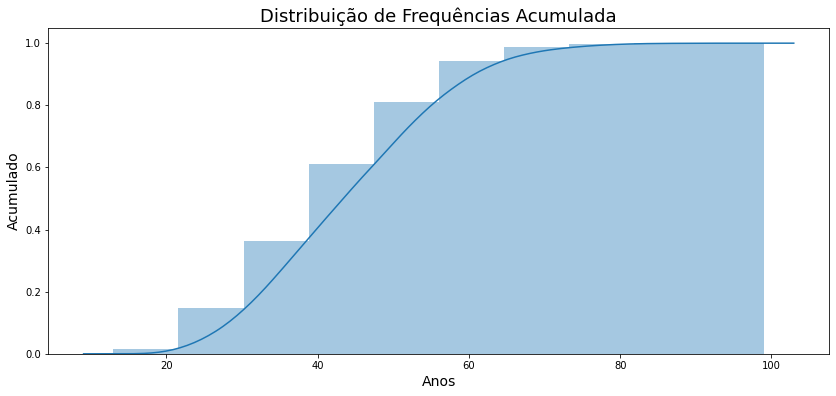

In [51]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True},
                  bins = 10)
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

#Boxplot

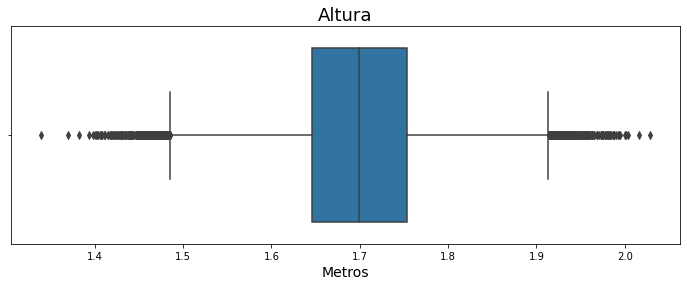

In [52]:
ax = sns.boxplot( x = 'Altura', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

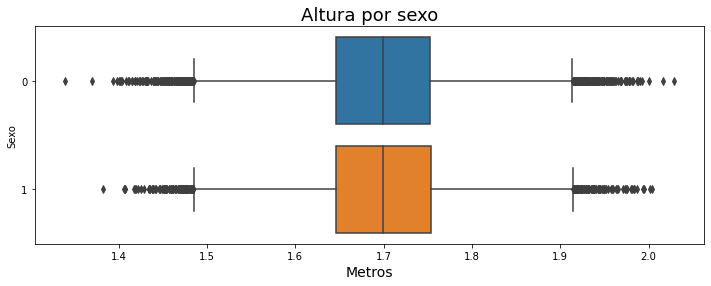

In [53]:
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura por sexo', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

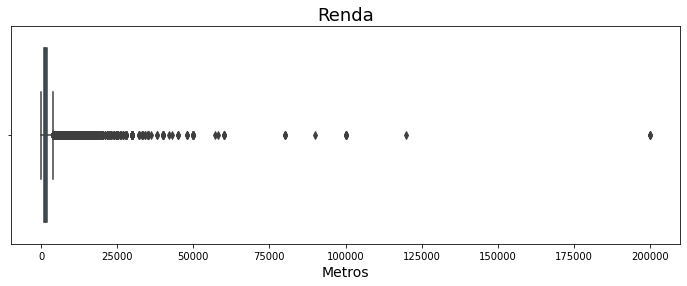

In [54]:
ax = sns.boxplot( x = 'Renda', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

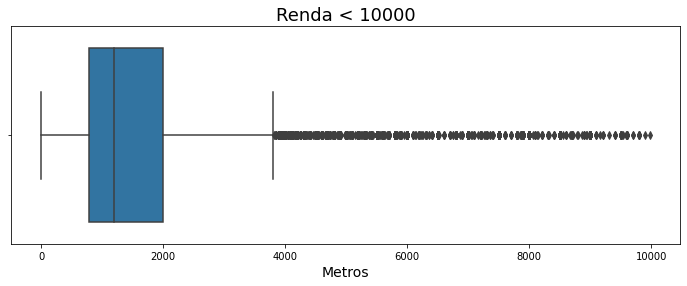

In [55]:
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda < 10000', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

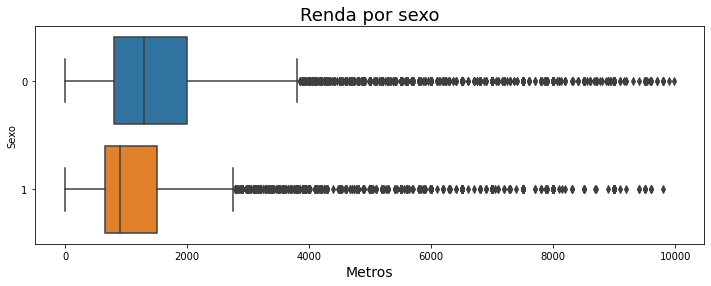

In [56]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda por sexo', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

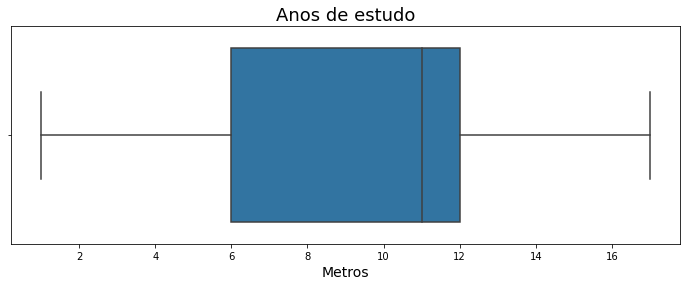

In [57]:
ax = sns.boxplot( x = 'Anos de Estudo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de estudo', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

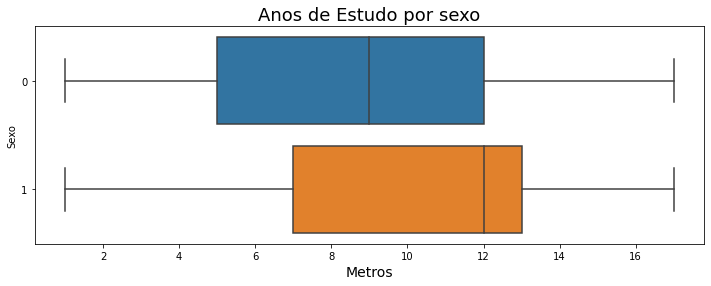

In [58]:
ax = sns.boxplot( x = 'Anos de Estudo',y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo por sexo', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

#Medidas de Dispersão

*   Desvio Médio Absoluto - mad()
*   Variância - var()



In [59]:
#Criando um DataFrame com as notas de fulano
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [60]:
#Pegando a média das notas de fulano
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [61]:
#Fazendo o cálculo do desvio medio absoluto para notas de fulano: notas de fulano - a média das notas de fulano
#Porém, temos o valor real, isto é, precisa ser em módulo, e não negativo.
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [62]:
#Criando uma nova coluna dos desvios, porém com o valor absoluto (em módulo)
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [63]:
#Para finalizar, aplicamos a média do desvio calculado anteriormente para concluir o desvio médio absoluto
notas_fulano['|Desvio|'].mean()

1.5510204081632648

In [65]:
#Para simplificar todo esse cálculo, temos a função "mad()" que faz o desvio médio absoluto de uma vez
desvio_medio_absoluto_fulano = notas_fulano['Fulano'].mad()
desvio_medio_absoluto_fulano

1.5510204081632648

In [69]:
notas_sicrano = df[['Sicrano']]
notas_sicrano

Matérias,Sicrano
Matemática,7.5
Português,8.0
Inglês,7.0
Geografia,8.0
História,8.0
Física,8.5
Química,7.0


In [68]:
desvio_medio_absoluto_sicrano = notas_sicrano['Sicrano'].mad()
desvio_medio_absoluto_sicrano

0.4693877551020408

In [71]:
#Criando uma nova coluna com o quadrado dos desvios de fulano
#Nós elevamos os valores e as unidades
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [72]:
#Calculando a variância através da média dos desvios ao quadrado que calculamos anteriormente
#Não utiliza-se "mean()" porque ele irá fazer a média das notas e queremos ela menos 1
notas_fulano['(Desvio)^2'].sum()/ (len(notas_fulano) - 1)

4.57142857142857

In [73]:
#Fazendo a variância utilizando a função "var()"
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

In [74]:
#Fazendo o desvio padrão a partir da raiz quadrada da variância calculada anteriormente
np.sqrt(variancia)

2.1380899352993947

In [76]:
#Desvio padrão utilizando a função "std()"
desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao

2.1380899352993947

#Atividades extra: Desvio padrão

---
Maneiras de localizar informações específicas no dataframe

In [79]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [111]:
#Descobrindo o desvio padrão das idades do sexo feminino
(dataset.loc[(dataset['Sexo'] == 'M'), ['Idade', 'Sexo']]).std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Idade    16.64532
dtype: float64

In [112]:
#Outra forma de fazer isso
dataset.groupby(['Sexo']).std().loc['M']

Idade    16.64532
Name: M, dtype: float64

#Dando continuidade ao projeto

In [113]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [119]:
dados.Renda.mode()

0    788
dtype: int64

In [122]:
#Outra maneira de definir o intervalo das classes dos dados quantitativos de "Renda"
#Aqui não precisamos setar um por um
#Pegamos a moda como base para as multiplicações (salário mínimo)
classes = [dados.Renda.min(), 2 * 788, 5 * 788, 15 * 788, 25 * 788, dados.Renda.max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]